# https://www.kaggle.com/harlfoxem/housesalesprediction

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('kc_house_data.csv')

In [3]:
data.shape

(21597, 21)

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
for i in data.columns:
    print(i,data[i].nunique())

id 21420
date 372
price 3622
bedrooms 12
bathrooms 29
sqft_living 1034
sqft_lot 9776
floors 6
waterfront 2
view 5
condition 5
grade 11
sqft_above 942
sqft_basement 306
yr_built 116
yr_renovated 70
zipcode 70
lat 5033
long 751
sqft_living15 777
sqft_lot15 8682


<Figure size 720x288 with 0 Axes>

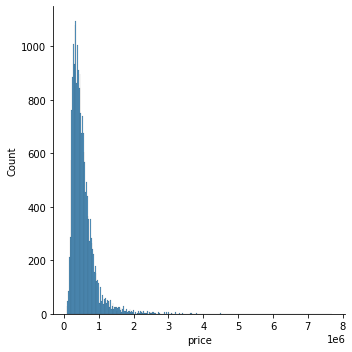

In [9]:
plt.figure(figsize=(10,4))
sns.displot(x=data['price'])
plt.show()

In [10]:
df_dis = [x for x in data.columns if data[x].nunique() <30]
df_dis = data[df_dis]
df_dis

,bedrooms,bathrooms,floors,waterfront,view,condition,grade
0,3,1.00,1.0,0,0,3,7
1,3,2.25,2.0,0,0,3,7
2,2,1.00,1.0,0,0,3,6
3,4,3.00,1.0,0,0,5,7
4,3,2.00,1.0,0,0,3,8
...,...,...,...,...,...,...,...
21592,3,2.50,3.0,0,0,3,8
21593,4,2.50,2.0,0,0,3,8
21594,2,0.75,2.0,0,0,3,7
21595,3,2.50,2.0,0,0,3,8


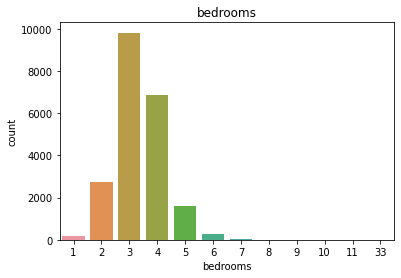

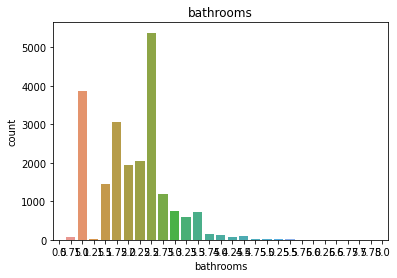

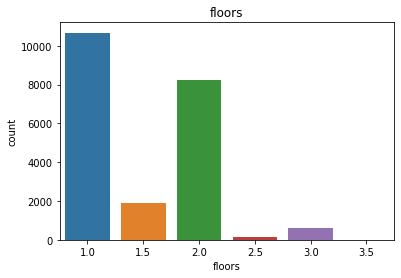

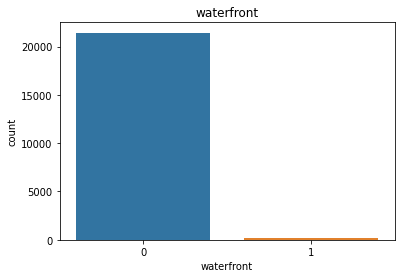

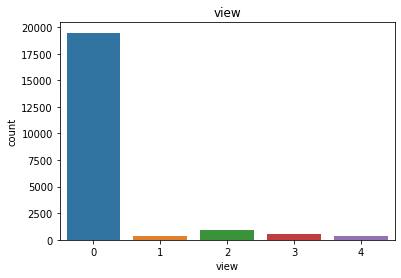

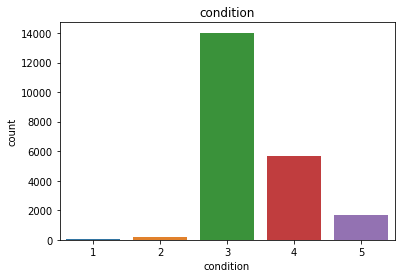

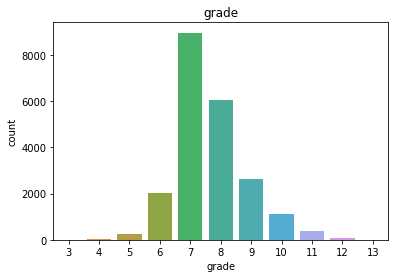

In [11]:
for i in df_dis:
    sns.countplot(x=data[i])
    plt.title(i)
    plt.show()

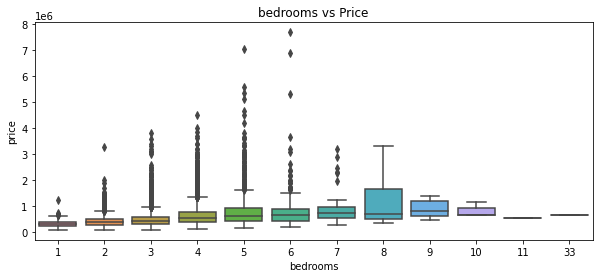

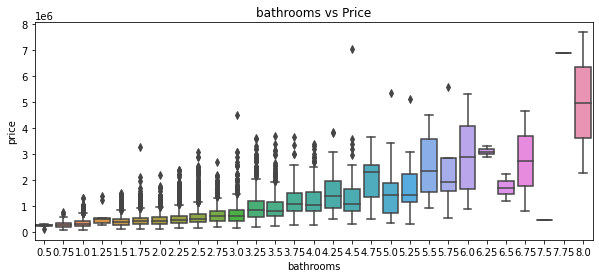

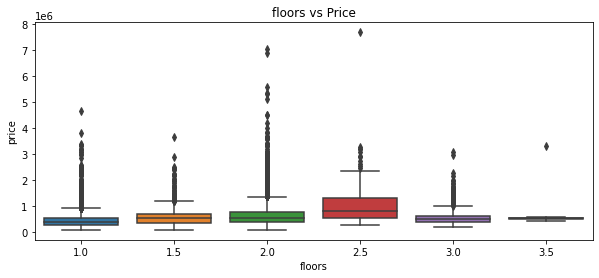

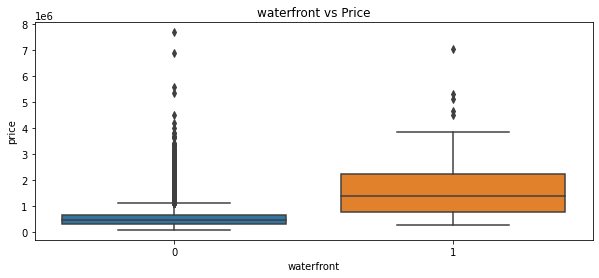

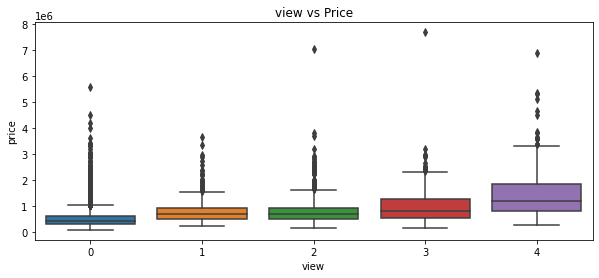

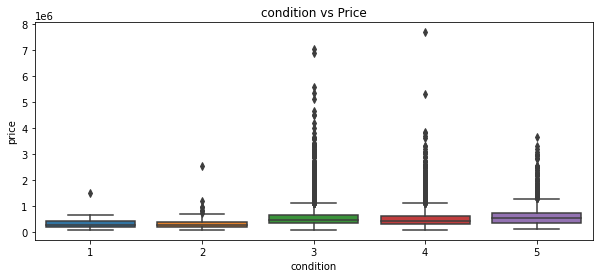

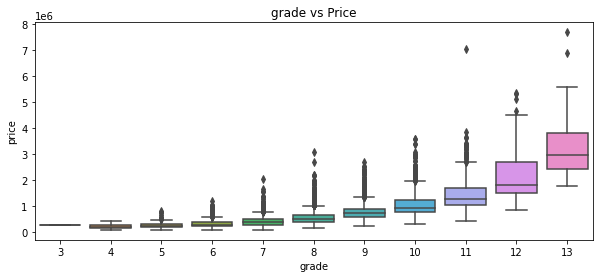

In [12]:
for i in df_dis:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=i,y='price',data=data)
    plt.title(i+" vs Price")
    plt.show()

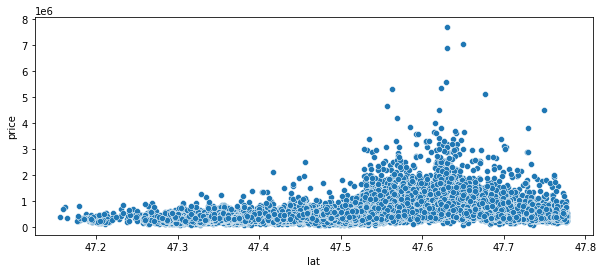

In [13]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='lat',y='price',data=data)
plt.show()

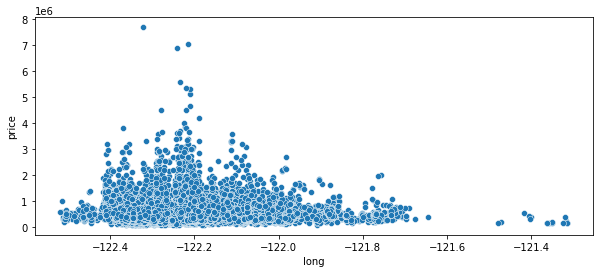

In [14]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='long',y='price',data=data)
plt.show()

In [15]:
len(data)*0.01

215.97

In [16]:
non_top_df = data.sort_values(by='price',ascending=False)[216:]

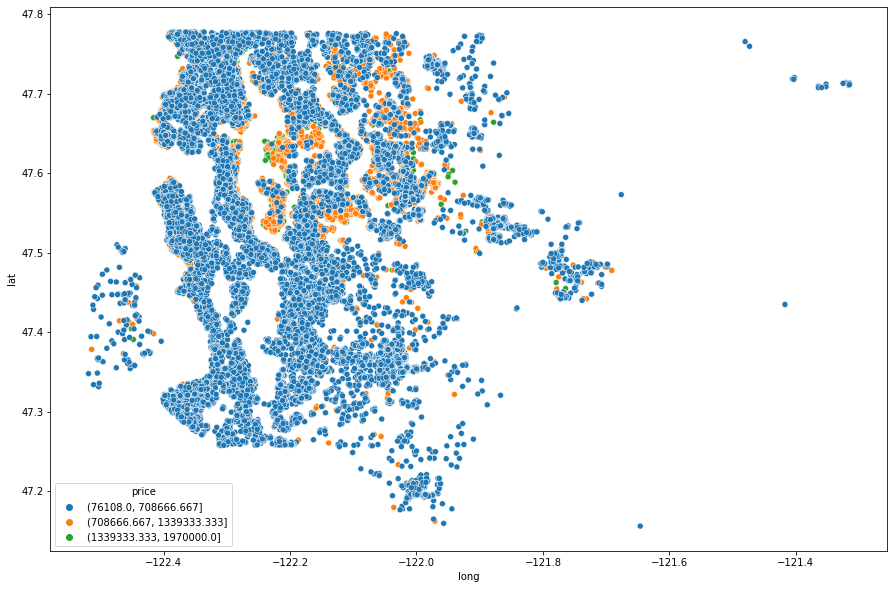

In [17]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='long',y='lat',data=non_top_df, hue=pd.cut(non_top_df['price'],3))
plt.show()

In [18]:
data['date']  = pd.to_datetime(data['date'])

In [19]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

In [20]:
data = data.drop(['id','date'],1)
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21593,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21594,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21595,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


<AxesSubplot:xlabel='month', ylabel='price'>

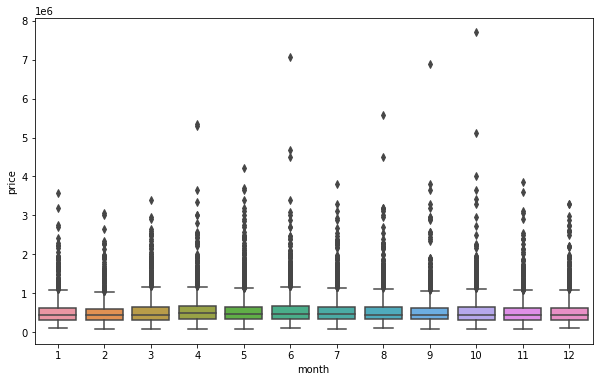

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month',y='price',data=data)

In [22]:
data.groupby('month')['price'].mean()

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

<AxesSubplot:xlabel='month'>

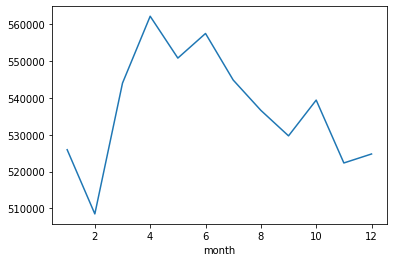

In [23]:
data.groupby('month')['price'].mean().plot()

In [24]:
data.groupby('year')['price'].mean()

year
2014    539350.911777
2015    542279.005878
Name: price, dtype: float64

<AxesSubplot:xlabel='year'>

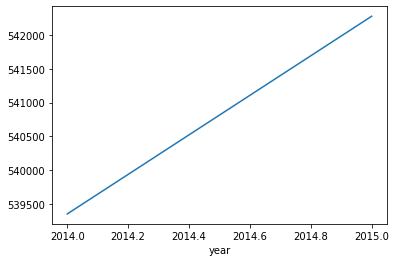

In [25]:
data.groupby('year')['price'].mean().plot()

<AxesSubplot:xlabel='year', ylabel='price'>

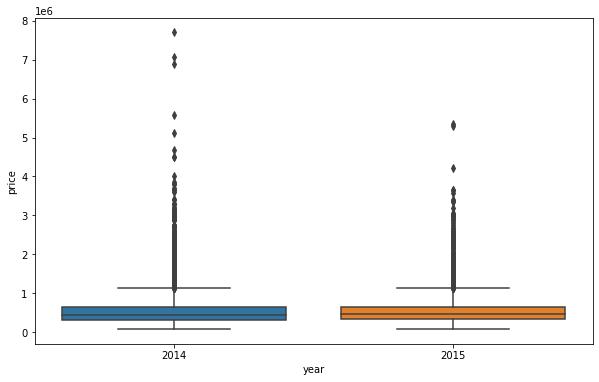

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(x='year',y='price',data=data)

In [27]:
data['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [28]:
data.drop('zipcode',1,inplace=True)

In [29]:
data['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2007       35
        ...  
1948        1
1954        1
1951        1
1944        1
1959        1
Name: yr_renovated, Length: 70, dtype: int64

In [30]:
data['was_renovated'] = np.where(data['yr_renovated'] == 0,0,1)
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,was_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,47.5112,-122.257,1340,5650,2014,10,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,47.7210,-122.319,1690,7639,2014,12,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,47.7379,-122.233,2720,8062,2015,2,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,47.5208,-122.393,1360,5000,2014,12,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,47.6168,-122.045,1800,7503,2015,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,0,2009,0,47.6993,-122.346,1530,1509,2014,5,0
21593,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,0,2014,0,47.5107,-122.362,1830,7200,2015,2,0
21594,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,0,2009,0,47.5944,-122.299,1020,2007,2014,6,0
21595,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,0,2004,0,47.5345,-122.069,1410,1287,2015,1,0


In [31]:
data['has_basement'] = np.where(data['sqft_basement'] == 0,0,1)
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,was_renovated,has_basement
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,47.5112,-122.257,1340,5650,2014,10,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991,47.7210,-122.319,1690,7639,2014,12,1,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,47.7379,-122.233,2720,8062,2015,2,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,0,47.5208,-122.393,1360,5000,2014,12,0,1
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,0,47.6168,-122.045,1800,7503,2015,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,2009,0,47.6993,-122.346,1530,1509,2014,5,0,0
21593,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,2014,0,47.5107,-122.362,1830,7200,2015,2,0,0
21594,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,2009,0,47.5944,-122.299,1020,2007,2014,6,0,0
21595,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,2004,0,47.5345,-122.069,1410,1287,2015,1,0,0


# Model time

In [32]:
X = data.drop('price',1).values
y = data['price'].values

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=26)

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
x_train_scale = scaler.fit_transform(X_train)

In [38]:
x_test_scale = scaler.transform(X_test)

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [40]:
X_train.shape

(15117, 21)

In [41]:
model = Sequential()
model.add(Dense(21,activation='relu'))
model.add(Dense(21,activation='relu'))
model.add(Dense(21,activation='relu'))
model.add(Dense(21,activation='relu'))
model.add(Dense(21,activation='relu'))
model.add(Dense(1))
          
model.compile(optimizer='adam',loss='mse')

In [42]:
model.fit(x=x_train_scale,y=y_train,validation_data=(x_test_scale,y_test),
          batch_size=128,epochs=1000)

Epoch 1/1000
119/119 [==============================] - 1s 2ms/step - loss: 428066865152.0000 - val_loss: 423514210304.0000
Epoch 2/1000
119/119 [==============================] - 0s 1ms/step - loss: 415932022784.0000 - val_loss: 373957197824.0000
Epoch 3/1000
119/119 [==============================] - 0s 1ms/step - loss: 235130650624.0000 - val_loss: 100732477440.0000
Epoch 4/1000
119/119 [==============================] - 0s 1ms/step - loss: 96113999872.0000 - val_loss: 95130378240.0000
Epoch 5/1000
119/119 [==============================] - 0s 1ms/step - loss: 93170319360.0000 - val_loss: 92440190976.0000
Epoch 6/1000
119/119 [==============================] - 0s 1ms/step - loss: 90370383872.0000 - val_loss: 89501696000.0000
Epoch 7/1000
119/119 [==============================] - 0s 1ms/step - loss: 87400923136.0000 - val_loss: 86602186752.0000
Epoch 8/1000
119/119 [==============================] - 0s 1ms/step - loss: 84279402496.0000 - val_loss: 83538714624.0000
Epoch 9/1000
119/1

119/119 [==============================] - 0s 1ms/step - loss: 32925513728.0000 - val_loss: 32227803136.0000
Epoch 68/1000
119/119 [==============================] - 0s 1ms/step - loss: 32859250688.0000 - val_loss: 32133447680.0000
Epoch 69/1000
119/119 [==============================] - 0s 1ms/step - loss: 32797267968.0000 - val_loss: 32051372032.0000
Epoch 70/1000
119/119 [==============================] - 0s 1ms/step - loss: 32770021376.0000 - val_loss: 31987294208.0000
Epoch 71/1000
119/119 [==============================] - 0s 1ms/step - loss: 32663154688.0000 - val_loss: 32030711808.0000
Epoch 72/1000
119/119 [==============================] - 0s 1ms/step - loss: 32635146240.0000 - val_loss: 31872659456.0000
Epoch 73/1000
119/119 [==============================] - 0s 1ms/step - loss: 32605765632.0000 - val_loss: 31805616128.0000
Epoch 74/1000
119/119 [==============================] - 0s 1ms/step - loss: 32540858368.0000 - val_loss: 31816052736.0000
Epoch 75/1000
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 30522683392.0000 - val_loss: 29459525632.0000
Epoch 134/1000
119/119 [==============================] - 0s 1ms/step - loss: 30509830144.0000 - val_loss: 29490585600.0000
Epoch 135/1000
119/119 [==============================] - 0s 1ms/step - loss: 30484420608.0000 - val_loss: 29570715648.0000
Epoch 136/1000
119/119 [==============================] - 0s 1ms/step - loss: 30422591488.0000 - val_loss: 29561221120.0000
Epoch 137/1000
119/119 [==============================] - 0s 1ms/step - loss: 30405353472.0000 - val_loss: 29435604992.0000
Epoch 138/1000
119/119 [==============================] - 0s 1ms/step - loss: 30444003328.0000 - val_loss: 29426855936.0000
Epoch 139/1000
119/119 [==============================] - 0s 1ms/step - loss: 30329571328.0000 - val_loss: 29359667200.0000
Epoch 140/1000
119/119 [==============================] - 0s 1ms/step - loss: 30389651456.0000 - val_loss: 29432633344.0000
Epoch 141/1000
119/119 

119/119 [==============================] - 0s 1ms/step - loss: 28740833280.0000 - val_loss: 28050028544.0000
Epoch 200/1000
119/119 [==============================] - 0s 1ms/step - loss: 28747968512.0000 - val_loss: 28087939072.0000
Epoch 201/1000
119/119 [==============================] - 0s 1ms/step - loss: 28727588864.0000 - val_loss: 27982467072.0000
Epoch 202/1000
119/119 [==============================] - 0s 1ms/step - loss: 28682561536.0000 - val_loss: 27948462080.0000
Epoch 203/1000
119/119 [==============================] - 0s 1ms/step - loss: 28655151104.0000 - val_loss: 28138741760.0000
Epoch 204/1000
119/119 [==============================] - 0s 1ms/step - loss: 28596998144.0000 - val_loss: 28080201728.0000
Epoch 205/1000
119/119 [==============================] - 0s 1ms/step - loss: 28652412928.0000 - val_loss: 28151582720.0000
Epoch 206/1000
119/119 [==============================] - 0s 1ms/step - loss: 28632215552.0000 - val_loss: 27856939008.0000
Epoch 207/1000
119/119 

119/119 [==============================] - 0s 1ms/step - loss: 27246835712.0000 - val_loss: 26892154880.0000
Epoch 266/1000
119/119 [==============================] - 0s 1ms/step - loss: 27262730240.0000 - val_loss: 27067473920.0000
Epoch 267/1000
119/119 [==============================] - 0s 1ms/step - loss: 27244421120.0000 - val_loss: 26850230272.0000
Epoch 268/1000
119/119 [==============================] - 0s 1ms/step - loss: 27200487424.0000 - val_loss: 27026927616.0000
Epoch 269/1000
119/119 [==============================] - 0s 1ms/step - loss: 27161247744.0000 - val_loss: 26836893696.0000
Epoch 270/1000
119/119 [==============================] - 0s 1ms/step - loss: 27239374848.0000 - val_loss: 26873935872.0000
Epoch 271/1000
119/119 [==============================] - 0s 1ms/step - loss: 27278798848.0000 - val_loss: 26849255424.0000
Epoch 272/1000
119/119 [==============================] - 0s 1ms/step - loss: 27194310656.0000 - val_loss: 26909485056.0000
Epoch 273/1000
119/119 

119/119 [==============================] - 0s 1ms/step - loss: 26290376704.0000 - val_loss: 26196879360.0000
Epoch 332/1000
119/119 [==============================] - 0s 1ms/step - loss: 26237083648.0000 - val_loss: 26217502720.0000
Epoch 333/1000
119/119 [==============================] - 0s 1ms/step - loss: 26274660352.0000 - val_loss: 26165678080.0000
Epoch 334/1000
119/119 [==============================] - 0s 1ms/step - loss: 26239744000.0000 - val_loss: 26390059008.0000
Epoch 335/1000
119/119 [==============================] - 0s 1ms/step - loss: 26244489216.0000 - val_loss: 26454071296.0000
Epoch 336/1000
119/119 [==============================] - 0s 1ms/step - loss: 26167304192.0000 - val_loss: 26203099136.0000
Epoch 337/1000
119/119 [==============================] - 0s 1ms/step - loss: 26176964608.0000 - val_loss: 26178652160.0000
Epoch 338/1000
119/119 [==============================] - 0s 1ms/step - loss: 26080352256.0000 - val_loss: 26156173312.0000
Epoch 339/1000
119/119 

119/119 [==============================] - 0s 1ms/step - loss: 25700126720.0000 - val_loss: 26201649152.0000
Epoch 398/1000
119/119 [==============================] - 0s 1ms/step - loss: 25674938368.0000 - val_loss: 26093193216.0000
Epoch 399/1000
119/119 [==============================] - 0s 1ms/step - loss: 25641023488.0000 - val_loss: 25983905792.0000
Epoch 400/1000
119/119 [==============================] - 0s 1ms/step - loss: 25657624576.0000 - val_loss: 25966837760.0000
Epoch 401/1000
119/119 [==============================] - 0s 1ms/step - loss: 25798033408.0000 - val_loss: 25886418944.0000
Epoch 402/1000
119/119 [==============================] - 0s 1ms/step - loss: 25650604032.0000 - val_loss: 25951008768.0000
Epoch 403/1000
119/119 [==============================] - 0s 1ms/step - loss: 25669877760.0000 - val_loss: 25947981824.0000
Epoch 404/1000
119/119 [==============================] - 0s 1ms/step - loss: 25758523392.0000 - val_loss: 25945745408.0000
Epoch 405/1000
119/119 

119/119 [==============================] - 0s 1ms/step - loss: 25398482944.0000 - val_loss: 26182725632.0000
Epoch 464/1000
119/119 [==============================] - 0s 1ms/step - loss: 25482317824.0000 - val_loss: 25863028736.0000
Epoch 465/1000
119/119 [==============================] - 0s 1ms/step - loss: 25282295808.0000 - val_loss: 26125428736.0000
Epoch 466/1000
119/119 [==============================] - 0s 1ms/step - loss: 25314850816.0000 - val_loss: 25867857920.0000
Epoch 467/1000
119/119 [==============================] - 0s 1ms/step - loss: 25334777856.0000 - val_loss: 26174375936.0000
Epoch 468/1000
119/119 [==============================] - 0s 1ms/step - loss: 25366945792.0000 - val_loss: 25891471360.0000
Epoch 469/1000
119/119 [==============================] - 0s 1ms/step - loss: 25331783680.0000 - val_loss: 25821007872.0000
Epoch 470/1000
119/119 [==============================] - 0s 1ms/step - loss: 25419327488.0000 - val_loss: 25847889920.0000
Epoch 471/1000
119/119 

119/119 [==============================] - 0s 1ms/step - loss: 25151434752.0000 - val_loss: 25735129088.0000
Epoch 530/1000
119/119 [==============================] - 0s 1ms/step - loss: 25070876672.0000 - val_loss: 25748932608.0000
Epoch 531/1000
119/119 [==============================] - 0s 1ms/step - loss: 25064970240.0000 - val_loss: 25851326464.0000
Epoch 532/1000
119/119 [==============================] - 0s 1ms/step - loss: 25108832256.0000 - val_loss: 25807093760.0000
Epoch 533/1000
119/119 [==============================] - 0s 1ms/step - loss: 25091297280.0000 - val_loss: 25895200768.0000
Epoch 534/1000
119/119 [==============================] - 0s 1ms/step - loss: 25089769472.0000 - val_loss: 25976147968.0000
Epoch 535/1000
119/119 [==============================] - 0s 1ms/step - loss: 25049874432.0000 - val_loss: 25883824128.0000
Epoch 536/1000
119/119 [==============================] - 0s 1ms/step - loss: 25169725440.0000 - val_loss: 25915072512.0000
Epoch 537/1000
119/119 

119/119 [==============================] - 0s 1ms/step - loss: 24982538240.0000 - val_loss: 25685164032.0000
Epoch 596/1000
119/119 [==============================] - 0s 1ms/step - loss: 24951334912.0000 - val_loss: 25660043264.0000
Epoch 597/1000
119/119 [==============================] - 0s 1ms/step - loss: 24939466752.0000 - val_loss: 25880150016.0000
Epoch 598/1000
119/119 [==============================] - 0s 1ms/step - loss: 24935976960.0000 - val_loss: 25709232128.0000
Epoch 599/1000
119/119 [==============================] - 0s 1ms/step - loss: 24913051648.0000 - val_loss: 25725515776.0000
Epoch 600/1000
119/119 [==============================] - 0s 1ms/step - loss: 24937424896.0000 - val_loss: 25794723840.0000
Epoch 601/1000
119/119 [==============================] - 0s 1ms/step - loss: 24910004224.0000 - val_loss: 26276415488.0000
Epoch 602/1000
119/119 [==============================] - 0s 1ms/step - loss: 25004244992.0000 - val_loss: 25793613824.0000
Epoch 603/1000
119/119 

119/119 [==============================] - 0s 1ms/step - loss: 24886188032.0000 - val_loss: 25616777216.0000
Epoch 662/1000
119/119 [==============================] - 0s 1ms/step - loss: 24833851392.0000 - val_loss: 25707810816.0000
Epoch 663/1000
119/119 [==============================] - 0s 1ms/step - loss: 24770080768.0000 - val_loss: 25586888704.0000
Epoch 664/1000
119/119 [==============================] - 0s 1ms/step - loss: 24931813376.0000 - val_loss: 25625235456.0000
Epoch 665/1000
119/119 [==============================] - 0s 1ms/step - loss: 24810553344.0000 - val_loss: 25551775744.0000
Epoch 666/1000
119/119 [==============================] - 0s 1ms/step - loss: 24811560960.0000 - val_loss: 25624358912.0000
Epoch 667/1000
119/119 [==============================] - 0s 1ms/step - loss: 24771862528.0000 - val_loss: 25610821632.0000
Epoch 668/1000
119/119 [==============================] - 0s 1ms/step - loss: 24868628480.0000 - val_loss: 25568911360.0000
Epoch 669/1000
119/119 

119/119 [==============================] - 0s 1ms/step - loss: 24601571328.0000 - val_loss: 25696933888.0000
Epoch 728/1000
119/119 [==============================] - 0s 1ms/step - loss: 24645005312.0000 - val_loss: 25679937536.0000
Epoch 729/1000
119/119 [==============================] - 0s 1ms/step - loss: 24689795072.0000 - val_loss: 25556557824.0000
Epoch 730/1000
119/119 [==============================] - 0s 1ms/step - loss: 24613548032.0000 - val_loss: 25990158336.0000
Epoch 731/1000
119/119 [==============================] - 0s 1ms/step - loss: 24602519552.0000 - val_loss: 25617309696.0000
Epoch 732/1000
119/119 [==============================] - 0s 1ms/step - loss: 24603873280.0000 - val_loss: 25713602560.0000
Epoch 733/1000
119/119 [==============================] - 0s 1ms/step - loss: 24679909376.0000 - val_loss: 25604524032.0000
Epoch 734/1000
119/119 [==============================] - 0s 1ms/step - loss: 24594978816.0000 - val_loss: 25656133632.0000
Epoch 735/1000
119/119 

119/119 [==============================] - 0s 1ms/step - loss: 24402509824.0000 - val_loss: 25857714176.0000
Epoch 794/1000
119/119 [==============================] - 0s 1ms/step - loss: 24439613440.0000 - val_loss: 25619091456.0000
Epoch 795/1000
119/119 [==============================] - 0s 1ms/step - loss: 24334833664.0000 - val_loss: 25644429312.0000
Epoch 796/1000
119/119 [==============================] - 0s 1ms/step - loss: 24429623296.0000 - val_loss: 25851942912.0000
Epoch 797/1000
119/119 [==============================] - 0s 1ms/step - loss: 24418248704.0000 - val_loss: 25747734528.0000
Epoch 798/1000
119/119 [==============================] - 0s 1ms/step - loss: 24453132288.0000 - val_loss: 25702975488.0000
Epoch 799/1000
119/119 [==============================] - 0s 1ms/step - loss: 24416811008.0000 - val_loss: 25645682688.0000
Epoch 800/1000
119/119 [==============================] - 0s 1ms/step - loss: 24461475840.0000 - val_loss: 25724192768.0000
Epoch 801/1000
119/119 

119/119 [==============================] - 0s 1ms/step - loss: 24303329280.0000 - val_loss: 25605294080.0000
Epoch 860/1000
119/119 [==============================] - 0s 1ms/step - loss: 24371746816.0000 - val_loss: 25639258112.0000
Epoch 861/1000
119/119 [==============================] - 0s 1ms/step - loss: 24325718016.0000 - val_loss: 25675126784.0000
Epoch 862/1000
119/119 [==============================] - 0s 1ms/step - loss: 24252534784.0000 - val_loss: 25753270272.0000
Epoch 863/1000
119/119 [==============================] - 0s 1ms/step - loss: 24451735552.0000 - val_loss: 25670623232.0000
Epoch 864/1000
119/119 [==============================] - 0s 1ms/step - loss: 24272019456.0000 - val_loss: 25772118016.0000
Epoch 865/1000
119/119 [==============================] - 0s 1ms/step - loss: 24297625600.0000 - val_loss: 25610487808.0000
Epoch 866/1000
119/119 [==============================] - 0s 1ms/step - loss: 24388505600.0000 - val_loss: 25726040064.0000
Epoch 867/1000
119/119 

119/119 [==============================] - 0s 1ms/step - loss: 24198053888.0000 - val_loss: 25800581120.0000
Epoch 926/1000
119/119 [==============================] - 0s 1ms/step - loss: 24173459456.0000 - val_loss: 25604370432.0000
Epoch 927/1000
119/119 [==============================] - 0s 1ms/step - loss: 24254814208.0000 - val_loss: 25691697152.0000
Epoch 928/1000
119/119 [==============================] - 0s 1ms/step - loss: 24190777344.0000 - val_loss: 25684705280.0000
Epoch 929/1000
119/119 [==============================] - 0s 1ms/step - loss: 24149495808.0000 - val_loss: 25668325376.0000
Epoch 930/1000
119/119 [==============================] - 0s 1ms/step - loss: 24208924672.0000 - val_loss: 25624397824.0000
Epoch 931/1000
119/119 [==============================] - 0s 1ms/step - loss: 24262862848.0000 - val_loss: 25627305984.0000
Epoch 932/1000
119/119 [==============================] - 0s 1ms/step - loss: 24290744320.0000 - val_loss: 25827545088.0000
Epoch 933/1000
119/119 

119/119 [==============================] - 0s 1ms/step - loss: 24168404992.0000 - val_loss: 25598482432.0000
Epoch 992/1000
119/119 [==============================] - 0s 1ms/step - loss: 24067383296.0000 - val_loss: 25711515648.0000
Epoch 993/1000
119/119 [==============================] - 0s 1ms/step - loss: 24172029952.0000 - val_loss: 25607546880.0000
Epoch 994/1000
119/119 [==============================] - 0s 1ms/step - loss: 24218118144.0000 - val_loss: 25649876992.0000
Epoch 995/1000
119/119 [==============================] - 0s 1ms/step - loss: 24129775616.0000 - val_loss: 25734365184.0000
Epoch 996/1000
119/119 [==============================] - 0s 1ms/step - loss: 24099680256.0000 - val_loss: 25677260800.0000
Epoch 997/1000
119/119 [==============================] - 0s 1ms/step - loss: 24100616192.0000 - val_loss: 25658386432.0000
Epoch 998/1000
119/119 [==============================] - 0s 1ms/step - loss: 24108447744.0000 - val_loss: 25791598592.0000
Epoch 999/1000
119/119 

In [43]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

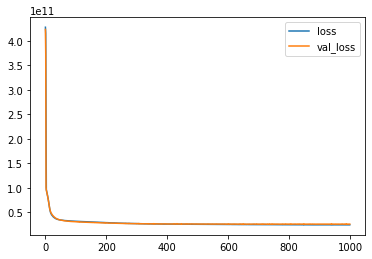

In [44]:
losses.plot()

In [45]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [46]:
pred = model.predict(x_test_scale)

In [47]:
np.sqrt(mean_squared_error(y_test,pred))

160337.05717660402

In [48]:
mean_absolute_error(y_test,pred)

99911.26946373457

In [49]:
explained_variance_score(y_test,pred)

0.8099413703031166

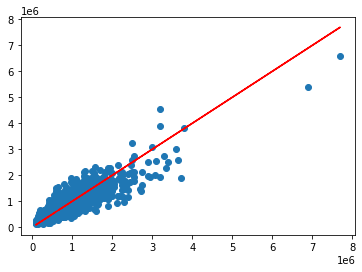

In [50]:
plt.scatter(y_test,pred)
plt.plot(y_test,y_test,'r-')